<a href="https://colab.research.google.com/github/Jhonier29/Proyecto-Detecci-n-de-estr-s/blob/main/CODIGOS/Clasificaci%C3%B3n_Binaria_Algoritmos_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cargar Librerias

In [ ]:
! pip install eli5

In [117]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
from keras.layers import LSTM, Dense
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

##Cargar Datos


In [ ]:
dataframe= pd.DataFrame()
backup_dataframe = dataframe
personas = ['pklS3_BD1','pklS4_BD1','pklS5_BD1','pklS6_BD1','pklS7_BD1','pklS8_BD1','pklS9_BD1','pklS10_BD1','pklS11_BD1','pklS13_BD1','pklS14_BD1','pklS15_BD1','pklS16_BD1','pklS17_BD1'] # Nombres de las bases de datos a usar
for i in personas:
  filename = '{0}.csv'.format(i)
  datos = pd.read_csv(filename,header=None)
  datos = datos.transpose()
  dataframe = pd.concat([dataframe, datos], axis=0)
dataframe= dataframe.reset_index(drop=True)
# Usar para BD1:
nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','target','target3']
# Usar para BD2:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','target','target3']
# Usar para BD3:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','tempm','SDNNt','maxt','mint','RangoT','penT','target','target3']
# Usar para BD4:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','tempm','SDNNt','maxt','mint','RangoT','penT', 'EMGm', 'SDNNEMG', 'RangoEMG', 'integralEMG', 'medianaEMG', 'P10', 'P90', 'XYZ1m', 'XYZ2m', 'XYZ3m', 'SDNNXYZ1', 'SDNNXYZ2' ,'SDNNXYZ3', 'integralXYZ1', 'integralXYZ2','integralXYZ3', 'pinm', 'poutm', 'SDNNin', 'SDNNout','ratioIE','rangores', 'BR','target','target3']

caract = nombres[0:-2]
dataframe.columns= nombres
dataframe.head()

##Normalizar datos 

In [119]:
for names in nombres[0:-1]:
    val = dataframe[str(names)]    
    dataframe[str(names)]= (val-val.min())/(val.max()-val.min())

###Datos normalizados

In [120]:
personas_test = ['pklS2_BD1']  #Sujeto con el cual se validara los algoritmos
testeo = pd.DataFrame()
for i in personas_test:
  filename = '{0}.csv'.format(i)
  pTest = pd.read_csv(filename,header=None)
  pTest = pTest.transpose()
  testeo = pd.concat([testeo, pTest], axis=0)
testeo= testeo.reset_index(drop=True)
testeo.columns= nombres
for names in nombres[0:-1]:
    val = testeo[str(names)]
    testeo[str(names)]= (val-val.min())/(val.max()-val.min())

##Datos de entrenamiento


In [121]:
X=dataframe[caract]  # Caracteristicas
y=dataframe['target']  # Etiqueta para clasifciacion de 2 clases

# Division de los datos para entrenamiento y prueba de manera automatica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% Entrenamiento y 20% prueba
# Conjunto de datos para validar los algoritmos con el sujeto extraido
X_out= testeo[caract]
y_out = testeo['target']

X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)


# Numero de divisiones de datos para validación cruzada

In [122]:
kfold_validacion = KFold(5)

#Algoritmos de ML

## Random Forest

In [123]:
#Hiperparámetros
n_estimators=80
max_depth=8
#Creación del modelo
RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
#Entrenamiento
RF.fit(X_train,y_train)
#Predicción
y_pred=RF.predict(X_test)

In [ ]:
# Metricas de analisis
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

###Caracteristicas mas importantes en RF

In [ ]:
feature_imp = pd.Series(RF.feature_importances_,index=caract).sort_values(ascending=False)
feature_imp
imp1= feature_imp
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Reporte de datos RF
report = classification_report(y_test, y_pred, output_dict=True)
resultadosRF = pd.DataFrame(report).transpose()
resultadosRF['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_pred)
resultadosRF['top_k_accuracy'] = metrics.top_k_accuracy_score(y_test,y_pred,k=1)
resultadosRF['brier_score_loss'] = metrics.brier_score_loss(y_test,y_pred)
resultadosRF['jaccard_score'] = metrics.jaccard_score(y_test,y_pred)
resultadosRF['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)

resultadosRF['clasificador']= 'RF'
resultados = cross_val_score(RF, X, y, cv = kfold_validacion)
resultadosRF['Cross Validation']=resultados.mean()
car_imp=feature_imp[0:len(resultadosRF.axes[0])]
resultadosRF['CAR.IMP']= car_imp.index
resultadosRF['n_extimator| maxdepth']= (str(n_estimators) +' | '+ str(max_depth)) 
resultadosRF

###Matriz de confusión

[[6332   84]
 [ 273 1561]]


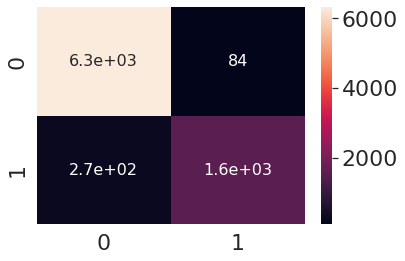

In [127]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.set(font_scale=2)
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16})
plt.show()

##SVM

In [ ]:
# Hiperparámetros SVM rbf
gamma= 2
C1 = 10
# Hiperparámetros SVM polinomial
degree= 6
C2 = 10
# Hiperparámetros SVM lineal
C3 = 70
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C1).fit(X_train.values, y_train)
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C2).fit(X_train.values, y_train)
lin_svc = svm.LinearSVC(C=C3, max_iter=10000).fit(X_train.values, y_train)

In [ ]:
# Resultados del modelo SVM rbf
Z = rbf_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
rbf = pd.DataFrame(report).transpose()
rbf['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
rbf['top_k_accuracy'] = metrics.top_k_accuracy_score(y_test,Z,k=1)
rbf['brier_score_loss'] = metrics.brier_score_loss(y_test,Z)
rbf['jaccard_score'] = metrics.jaccard_score(y_test,Z)
rbf['roc_auc'] = metrics.roc_auc_score(y_test,Z)

resultados = cross_val_score(rbf_svc, X, y, cv = kfold_validacion)
rbf['Cross Validation'] = resultados.mean()

In [ ]:
# Resultados del modelo SVM polinomial
Z = poly_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
poly = pd.DataFrame(report).transpose()
poly['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
poly['top_k_accuracy'] = metrics.top_k_accuracy_score(y_test,Z,k=1)
poly['brier_score_loss'] = metrics.brier_score_loss(y_test,Z)
poly['jaccard_score'] = metrics.jaccard_score(y_test,Z)
poly['roc_auc'] = metrics.roc_auc_score(y_test,Z)
resultados = cross_val_score(poly_svc, X, y, cv = kfold_validacion)
poly['Cross Validation'] = resultados.mean()

In [ ]:
# Resultados del modelo SVM lineal
Z = lin_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
lin = pd.DataFrame(report).transpose()
lin['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
lin['top_k_accuracy'] = metrics.top_k_accuracy_score(y_test,Z,k=1)
lin['brier_score_loss'] = metrics.brier_score_loss(y_test,Z)
lin['jaccard_score'] = metrics.jaccard_score(y_test,Z)
lin['roc_auc'] = metrics.roc_auc_score(y_test,Z)
resultados = cross_val_score(lin_svc, X, y, cv = kfold_validacion)
lin['Cross Validation'] = resultados.mean()

In [132]:
rbf['C | gamma']=str(C1)+' | '+str(gamma)
poly['C | degree']= str(C2)+' | '+str(degree)
lin['C']= str(C3)

###Caracteristicas mas importantes de SVM

In [ ]:
features_svmL=pd.Series(abs(lin_svc.coef_[0]), index=caract).sort_values(ascending=False)
%matplotlib inline
car_imp=features_svmL[0:5]
imp2=features_svmL
lin['CAR.IMP']= car_imp.index
# Creating a bar plot
sns.barplot(x=features_svmL, y=features_svmL.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
perm_importance = permutation_importance(rbf_svc, X_test.values, y_test.values)
feature_names=caract
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
imp3=features[sorted_idx]
imp3=imp3[::-1]
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
rbf['CAR.IMP']= features[sorted_idx][::-1][0:5]
rbf['CAR.IMP']

In [ ]:
perm_importance = permutation_importance(poly_svc, X_test.values, y_test.values)
feature_names=caract
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
imp4=features[sorted_idx]
imp4=imp4[::-1]
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
poly['CAR.IMP']= features[sorted_idx][::-1][0:5]
poly['CAR.IMP']

In [ ]:
resultadosSVM = pd.concat([rbf,poly,lin], axis=0)
resultadosSVM['clasificador']= ['rbf','rbf','rbf','rbf','rbf','poly','poly','poly','poly','poly','linear','linear','linear','linear','linear'] 
resultadosSVM

##Red Neuronal


###2 clases

In [ ]:
epochsRN = 50

def baseline_model():
  # crea el modelo
  model = Sequential()
  model.add(Dense(len(caract), input_dim=len(caract), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
model = KerasClassifier(build_fn=baseline_model,epochs= epochsRN, verbose=0)
seed = 5
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)

In [ ]:
#Entrenamiento de la red
model.fit(X_train, y_train)

In [142]:
# Caracteristicas importantes
perm = PermutationImportance(model, random_state=1).fit(X_train,y_train)
impFNN=np.argsort(perm.feature_importances_)
features = np.array(feature_names)
imp5=features[impFNN][::-1]

In [ ]:
# Resultados RN
y_pr= model.predict(X_test)
report = classification_report(y_test,y_pr.round(), output_dict=True)
resultadosRN = pd.DataFrame()
RNeuronal = pd.DataFrame(report).transpose()
RNeuronal['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_pr.round())
RNeuronal['top_k_accuracy'] = metrics.top_k_accuracy_score(y_test,y_pr.round(),k=1)
RNeuronal['brier_score_loss'] = metrics.brier_score_loss(y_test,y_pr.round())
RNeuronal['jaccard_score'] = metrics.jaccard_score(y_test,y_pr.round())
RNeuronal['roc_auc'] = metrics.roc_auc_score(y_test,y_pr.round())
resultadosRN = resultadosRN.append(RNeuronal)
resultadosRN['CAR.IMP']= features[impFNN][::-1][0:5]
resultadosRN['epocas'] = str(epochsRN)
resultadosRN['clasificador'] = 'RN'
resultadosRN['Cross Validation'] = results.mean()

#Red Neuronal LSTM

In [144]:
# Añadir una tercera dimensión a los conjuntos de datos
nmp=X_train.to_numpy()
Xa = np.reshape(nmp, (len(nmp),1,len(caract)))
XTa = np.reshape(X_test.values, (len(X_test),1,len(caract)))

###Binario


In [ ]:
# Clasificación Binaria

epochsLSTM =20
neurons = 0

def LSTM_model(neurons):
  # crea el modelo
  modelo = Sequential()
  modelo.add(LSTM(len(caract), input_dim=X_train.shape[1], activation='relu'))
  modelo.add(Dense(1, activation='sigmoid'))
  modelo.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
  return modelo
modelLSTM = KerasClassifier(build_fn=LSTM_model, neurons = neurons,epochs= epochsLSTM, verbose=0)
seed = 5
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
resultsLSTM = cross_val_score(modelLSTM, Xa, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (resultsLSTM.mean()*100, resultsLSTM.std()*100))

In [ ]:
# Entrenamiento de la red LSTM
modelLSTM.fit(Xa, y_train)

In [ ]:
# Caracterisitcas importantes
CILSTM = []
predLSTM= modelLSTM.predict(XTa,verbose=0).squeeze()
baseline_mae = np.mean(np.abs(predLSTM-y_test))         
COLS = list(X_train.columns)
for k in tqdm(range(len(COLS))):
                
  save_col = XTa[:,:,k].copy()
  np.random.shuffle(XTa[:,:,k])
          
  oof_preds = modelLSTM.predict(XTa, verbose=0).squeeze() 
  mae = np.mean(np.abs( oof_preds-y_test ))
  CILSTM.append({'feature':COLS[k],'mae':mae})
  XTa[:,:,k] = save_col

In [ ]:
df = pd.DataFrame(CILSTM)
df = df.sort_values('mae',ascending=False)
imp6=np.array(df['feature'][0::])
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(COLS)),df.mae)
plt.yticks(np.arange(len(COLS)),df.feature.values)
plt.title('LSTM Feature Importance',size=16)
plt.ylim((-1,len(COLS)+1))
plt.plot([baseline_mae,baseline_mae],[-1,len(COLS)+1], '--', color='orange',
          label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
plt.xlabel(f'OOF MAE with feature permuted',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()

In [ ]:
#Resultados de red LSTM
predLSTM= modelLSTM.predict(XTa)
report = classification_report(y_test,predLSTM, output_dict=True)
resultadosRNLSTM = pd.DataFrame()
RNLSTM = pd.DataFrame(report).transpose()
RNLSTM['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,predLSTM.round())
RNLSTM['top_k_accuracy'] = metrics.top_k_accuracy_score(y_test,predLSTM.round(),k=1)
RNLSTM['brier_score_loss'] = metrics.brier_score_loss(y_test,predLSTM.round())
RNLSTM['jaccard_score'] = metrics.jaccard_score(y_test,predLSTM.round())
RNLSTM['roc_auc'] = metrics.roc_auc_score(y_test,predLSTM.round())
resultadosRNLSTM = resultadosRNLSTM.append(RNLSTM)
resultadosRNLSTM['CAR.IMP']= np.array(df['feature'][0:5])
resultadosRNLSTM['epocas '] =str(epochsLSTM)
resultadosRNLSTM['Cross Validation'] = resultsLSTM.mean()
resultadosRNLSTM['clasificador'] = 'LSTM'
resultadosRNLSTM.head()

ADABOOST

In [ ]:
ydf = pd.DataFrame(y_train)
ytestdf = pd.DataFrame(y_test)
# Hiperparámetros
n_estimator= 50
learning_rate= 0.1

AB = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
AB.fit(X_train, y_train)
y_predAB=AB.predict(X_test)

if max(y_test)==2:
  xad = X_train.drop(ydf[ydf['target3']==0].index)
  yad =y_train.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)

  for i in range(0,len(y_predAB),1):
    if y_predAB[i]==1:
      y_predAB[i] = AB2.predict(X_test.loc[[i]])

print(classification_report(y_test, y_predAB))

In [ ]:
# Caracteristicas importantes
feature_impAB = pd.Series(AB.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_impAB
imp7=feature_impAB
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_impAB, y=feature_impAB.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Resultados AB
report = classification_report(y_test,y_predAB, output_dict=True)
resultadosAB = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB = resultadosAB.append(rAB)
resultadosAB['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_predAB)
resultadosAB['top_k_accuracy'] = metrics.top_k_accuracy_score(y_test,y_predAB,k=1)
resultadosAB['brier_score_loss'] = metrics.brier_score_loss(y_test,y_predAB)
resultadosAB['jaccard_score'] = metrics.jaccard_score(y_test,y_predAB)
resultadosAB['roc_auc'] = metrics.roc_auc_score(y_test,y_predAB)
resultadosAB['n_est | learning rate']= str(n_estimator)+' | '+str(learning_rate)
resultadosAB['clasificador']='Adaboost'
resultados = cross_val_score(AB, X, y, cv = kfold_validacion)
resultadosAB['Cross Validation'] = resultados.mean()
car_imp=feature_impAB[0:len(resultadosAB.axes[0])]
resultadosAB['CAR.IMP']= car_imp.index
resultadosAB

### Concatenación de los resultados de los algoritmos con la división de datos 80% - 20%

In [ ]:
resul = pd.concat([resultadosRF, resultadosSVM, resultadosRN,resultadosRNLSTM, resultadosAB], axis=0)
resul.fillna('-')

### Validación con el sujeto extraido

In [ ]:
#RF
y_pred=RF.predict(X_out)
report = classification_report(y_out, y_pred, output_dict=True)
resultadosRF2 = pd.DataFrame(report).transpose()
resultadosRF2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_pred)
resultadosRF2['top_k_accuracy*'] = metrics.top_k_accuracy_score(y_out,y_pred,k=1)
resultadosRF2['brier_score_loss*'] = metrics.brier_score_loss(y_out,y_pred)
resultadosRF2['jaccard_score*'] = metrics.jaccard_score(y_out,y_pred)
resultadosRF2['roc_auc*'] = metrics.roc_auc_score(y_out,y_pred)
#SVM rbf
Z = rbf_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
rbf2 = pd.DataFrame(report).transpose()
rbf2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)
rbf2['top_k_accuracy*'] = metrics.top_k_accuracy_score(y_out,Z,k=1)
rbf2['brier_score_loss*'] = metrics.brier_score_loss(y_out,Z)
rbf2['jaccard_score*'] = metrics.jaccard_score(y_out,Z)
rbf2['roc_auc*'] = metrics.roc_auc_score(y_out,Z)

#SVM polinomial

Z = poly_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
poly2 = pd.DataFrame(report).transpose()
poly2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)
poly2['top_k_accuracy*'] = metrics.top_k_accuracy_score(y_out,Z,k=1)
poly2['brier_score_loss*'] = metrics.brier_score_loss(y_out,Z)
poly2['jaccard_score*'] = metrics.jaccard_score(y_out,Z)
poly2['roc_auc*'] = metrics.roc_auc_score(y_out,Z)

#SVM lineal
Z = lin_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
lin2 = pd.DataFrame(report).transpose()
lin2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)
lin2['top_k_accuracy*'] = metrics.top_k_accuracy_score(y_out,Z,k=1)
lin2['brier_score_loss*'] = metrics.brier_score_loss(y_out,Z)
lin2['jaccard_score*'] = metrics.jaccard_score(y_out,Z)
lin2['roc_auc*'] = metrics.roc_auc_score(y_out,Z)

resultadosSVM2 = pd.concat([rbf2,poly2,lin2], axis=0)

#RN
y_pr= model.predict(X_out)
report = classification_report(y_out,y_pr.round(), output_dict=True)
resultadosRN = pd.DataFrame()
RNeuronal2 = pd.DataFrame(report).transpose()
RNeuronal2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_pr.round())
RNeuronal2['top_k_accuracy*'] = metrics.top_k_accuracy_score(y_out,y_pr.round(),k=1)
RNeuronal2['brier_score_loss*'] = metrics.brier_score_loss(y_out,y_pr.round())
RNeuronal2['jaccard_score*'] = metrics.jaccard_score(y_out,y_pr.round())
RNeuronal2['roc_auc*'] = metrics.roc_auc_score(y_out,y_pr.round())

resultadosRN2 = resultadosRN.append(RNeuronal2)

#LSTM
XTa = np.reshape(X_out.values, (len(X_out),1,len(caract)))
predLSTM= modelLSTM.predict(XTa)
report = classification_report(y_out,predLSTM, output_dict=True)
resultadosRNLSTM2 = pd.DataFrame()
RNLSTM2 = pd.DataFrame(report).transpose()
RNLSTM2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,predLSTM.round())
RNLSTM2['top_k_accuracy*'] = metrics.top_k_accuracy_score(y_out,predLSTM.round(),k=1)
RNLSTM2['brier_score_loss*'] = metrics.brier_score_loss(y_out,predLSTM.round())
RNLSTM2['jaccard_score*'] = metrics.jaccard_score(y_out,predLSTM.round())
RNLSTM2['roc_auc*'] = metrics.roc_auc_score(y_out,predLSTM.round())

resultadosRNLSTM2 = resultadosRNLSTM2.append(RNLSTM2)

#AB
y_predAB=AB.predict(X_out)

if max(y_out)==2:
  xad = X.drop(ydf[ydf['target3']==0].index)
  yad =y.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)

 
  for i in range(0,len(y_predAB)-1,1):
    #i = int(i)
    if y_predAB[i]==1:
       y_predAB[i] = AB2.predict(X_test.loc[[i]])
     # y_l = y_l.append(AB2.predict(X_test.loc[[i]]))
    
  
report = classification_report(y_out,y_predAB, output_dict=True)
resultadosAB = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB2 = resultadosAB.append(rAB)
    #resultadosSVM = resultadosSVM()
resultadosAB2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_predAB)
resultadosAB2['top_k_accuracy*'] = metrics.top_k_accuracy_score(y_out,y_predAB,k=1)
resultadosAB2['brier_score_loss*'] = metrics.brier_score_loss(y_out,y_predAB)
resultadosAB2['jaccard_score*'] = metrics.jaccard_score(y_out,y_predAB)
resultadosAB2['roc_auc*'] = metrics.roc_auc_score(y_out,y_predAB)
resultadosAB2[''] = ''

result = pd.concat([resultadosRF2, resultadosSVM2, resultadosRN2,resultadosRNLSTM2, resultadosAB2], axis=0)
result.fillna('-')

## Procedimiento de extracción de resultados con las caracteristicas mas importantes extraidas

In [161]:
numeroCarImp = 5 #Numero de caracteristicas mas relevantes con las cuales se va a entrenar
dfimp1=pd.DataFrame(imp1[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})
dfimp2=pd.DataFrame(imp2[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})
dfimp3=pd.DataFrame(imp3[0:numeroCarImp],columns=['Carac'])
dfimp4=pd.DataFrame(imp4[0:numeroCarImp],columns=['Carac'])
dfimp5=pd.DataFrame(imp5[0:numeroCarImp],columns=['Carac'])
dfimp6=pd.DataFrame(imp6[0:numeroCarImp],columns=['Carac'])
dfimp7=pd.DataFrame(imp7[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})

### Lista de caracteristica más relevantes en orden de importancia

In [ ]:
dfCarImp=pd.DataFrame(pd.concat([dfimp1['Carac'],dfimp2['Carac'],dfimp3['Carac'],dfimp4['Carac'],dfimp5['Carac'],dfimp6['Carac'],dfimp7['Carac']],axis=0))
resultadosCar = dfCarImp.value_counts().reset_index()
CaracCo=list(resultadosCar['Carac'][0:numeroCarImp])
CaracCo

In [163]:
# Creación de los nuevos conjuntos de entrenamiento con las caracteristicas mas importantes
X_train2=X_train[CaracCo].copy()
X_out2=X_out[CaracCo].copy()

Entrenamiento y validación de los algoritmos

In [ ]:
RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train2,y_train)
y_pred=RF.predict(X_out2)
report = classification_report(y_out, y_pred, output_dict=True)
resultadosRF3 = pd.DataFrame(report).transpose()
resultadosRF3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_pred)
resultadosRF3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_pred)
resultadosRF3['top_k_accuracy**'] = metrics.top_k_accuracy_score(y_out,y_pred,k=1)
resultadosRF3['brier_score_loss**'] = metrics.brier_score_loss(y_out,y_pred)
resultadosRF3['jaccard_score**'] = metrics.jaccard_score(y_out,y_pred)
resultadosRF3['roc_auc**'] = metrics.roc_auc_score(y_out,y_pred)

#SVM
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C1).fit(X_train2.values, y_train)
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C2).fit(X_train2.values, y_train)
lin_svc = svm.LinearSVC(C=C3, max_iter=10000).fit(X_train2.values, y_train)

Z = rbf_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
rbf3 = pd.DataFrame(report).transpose()
rbf3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)
rbf3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)
rbf3['top_k_accuracy**'] = metrics.top_k_accuracy_score(y_out,Z,k=1)
rbf3['brier_score_loss**'] = metrics.brier_score_loss(y_out,Z)
rbf3['jaccard_score**'] = metrics.jaccard_score(y_out,Z)
rbf3['roc_auc**'] = metrics.roc_auc_score(y_out,Z)

Z = poly_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
poly3 = pd.DataFrame(report).transpose()
poly3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)
poly3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)
poly3['top_k_accuracy**'] = metrics.top_k_accuracy_score(y_out,Z,k=1)
poly3['brier_score_loss**'] = metrics.brier_score_loss(y_out,Z)
poly3['jaccard_score**'] = metrics.jaccard_score(y_out,Z)
poly3['roc_auc**'] = metrics.roc_auc_score(y_out,Z)

Z = lin_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
lin3 = pd.DataFrame(report).transpose()
lin3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)
lin3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)
lin3['top_k_accuracy**'] = metrics.top_k_accuracy_score(y_out,Z,k=1)
lin3['brier_score_loss**'] = metrics.brier_score_loss(y_out,Z)
lin3['jaccard_score**'] = metrics.jaccard_score(y_out,Z)
lin3['roc_auc**'] = metrics.roc_auc_score(y_out,Z)
resultadosSVM3 = pd.concat([rbf3,poly3,lin3], axis=0)

#RN
# defino el baseline del modelo
def baseline_model():
  # crea el modelo
  model = Sequential()
  model.add(Dense(len(CaracCo), input_dim=len(CaracCo), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile el modelo
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
model = KerasClassifier(build_fn=baseline_model,epochs= epochsRN, verbose=0)


model.fit(X_train2, y_train)
y_pr= model.predict(X_out2)
report = classification_report(y_out,y_pr.round(), output_dict=True)
resultadosRN3 = pd.DataFrame()
RNeuronal3 = pd.DataFrame(report).transpose()
RNeuronal3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_pr.round())
RNeuronal3['top_k_accuracy**'] = metrics.top_k_accuracy_score(y_out,y_pr.round(),k=1)
RNeuronal3['brier_score_loss**'] = metrics.brier_score_loss(y_out,y_pr.round())
RNeuronal3['jaccard_score**'] = metrics.jaccard_score(y_out,y_pr.round())
RNeuronal3['roc_auc**'] = metrics.roc_auc_score(y_out,y_pr.round())
resultadosRN3 = resultadosRN3.append(RNeuronal3)

#LSTM
nmp=X_train2.to_numpy()
Xa = np.reshape(nmp, (len(nmp),1,len(CaracCo)))
XTa = np.reshape(X_out2.values, (len(X_out2),1,len(CaracCo)))


# defino el baseline del modelo
def LSTM_model(neurons):
  # crea el modelo
  modelo = Sequential()
  modelo.add(LSTM(len(CaracCo), input_dim=X_train2.shape[1], activation='relu'))
  modelo.add(Dense(1, activation='sigmoid'))
  modelo.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
  # Compile el modelo
  return modelo

modelLSTM = KerasClassifier(build_fn=LSTM_model, neurons = neurons,epochs= epochsLSTM, verbose=0)
modelLSTM.fit(Xa, y_train)


predLSTM= modelLSTM.predict(XTa)
report = classification_report(y_out,predLSTM, output_dict=True)
resultadosRNLSTM3 = pd.DataFrame()
RNLSTM3 = pd.DataFrame(report).transpose()
RNLSTM3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,predLSTM.round())
RNLSTM3['top_k_accuracy**'] = metrics.top_k_accuracy_score(y_out,predLSTM.round(),k=1)
RNLSTM3['brier_score_loss**'] = metrics.brier_score_loss(y_out,predLSTM.round())
RNLSTM3['jaccard_score**'] = metrics.jaccard_score(y_out,predLSTM.round())
RNLSTM3['roc_auc**'] = metrics.roc_auc_score(y_out,predLSTM.round())
resultadosRNLSTM3 = resultadosRNLSTM3.append(RNLSTM3)

#AB
AB = AdaBoostClassifier(n_estimators = n_estimator, learning_rate= learning_rate)
AB.fit(X_train2, y_train)
#y_l =list()

y_predAB=AB.predict(X_out2)

if max(y_out)==2:
  xad = X_train2.drop(ydf[ydf['target3']==0].index)
  yad =y.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators = n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)

 
  for i in range(0,len(y_predAB)-1,1):
    #i = int(i)
    if y_predAB[i]==1:
       y_predAB[i] = AB2.predict(X_test.loc[[i]])
     # y_l = y_l.append(AB2.predict(X_test.loc[[i]]))

report = classification_report(y_out,y_predAB, output_dict=True)
resultadosAB3 = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB3 = resultadosAB3.append(rAB)
    #resultadosSVM = resultadosSVM()
resultadosAB3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_predAB)
resultadosAB3['top_k_accuracy**'] = metrics.top_k_accuracy_score(y_out,y_predAB,k=1)
resultadosAB3['brier_score_loss**'] = metrics.brier_score_loss(y_out,y_predAB)
resultadosAB3['jaccard_score**'] = metrics.jaccard_score(y_out,y_predAB)
resultadosAB3['roc_auc**'] = metrics.roc_auc_score(y_out,y_predAB)

result2 = pd.concat([resultadosRF3, resultadosSVM3, resultadosRN3,resultadosRNLSTM3, resultadosAB3], axis=0)
result2.fillna('-')

##Unión de todos los resultados

In [ ]:
Final_res = pd.concat([resul,result,result2], axis=1)
Final_res.fillna('-')

# Guardar archivo de datos

In [166]:
Final_res.to_excel(str(personas_test)[5:-2]+'_C='+str(numeroCarImp)+'_bin.xlsx')